In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%pip install statsmodels --upgrade 
from statsmodels.tsa.ar_model import AutoReg

Note: you may need to restart the kernel to use updated packages.


In [3]:
df = pd.read_csv("dmt2.csv")
df.shape
df.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [4]:
temp = df.Temp
# or temp = df["Temp"]
temp.head()

0    20.7
1    17.9
2    18.8
3    14.6
4    15.8
Name: Temp, dtype: float64

In [5]:
df.columns

Index(['Date', 'Temp'], dtype='object')

In [9]:
print(df['Temp'].dtype)
print(df['Date'].dtype)

float64
object


In [8]:
print(df.isnull().sum())

Date     0
Temp    11
dtype: int64


In [10]:
df['Temp'].fillna(df['Temp'].mean(), inplace=True)
# or df.dropna(subset=['Temp'], inplace=True)

In [11]:
# Replace inf values with NaN and then drop/fill NaN values
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(subset=['Temp'], inplace=True)
# Alternatively, fill NaN values if necessary
# df['Temp'].fillna(df['Temp'].mean(), inplace=True)

In [12]:
from statsmodels.tsa.stattools import adfuller 
dftest= adfuller(df["Temp"] , autolag = "AIC")
print("1.) ADF TEST :", dftest[0])
print("2.) P VALUE  :", dftest[1])
print("3.) NO OF LAGS  :", dftest[2])
print("4.) NO OF OBSERVATIONS USED :", dftest[3])
print("5.) CRITICAL VALUES  :")
for key , value in dftest[4].items():
    print("\t" , key , ":" , value)

1.) ADF TEST : -4.3668810104667175
2.) P VALUE  : 0.0003395603321784679
3.) NO OF LAGS  : 19
4.) NO OF OBSERVATIONS USED : 3632
5.) CRITICAL VALUES  :
	 1% : -3.4321517422129952
	 5% : -2.8623361092467525
	 10% : -2.567193781223316


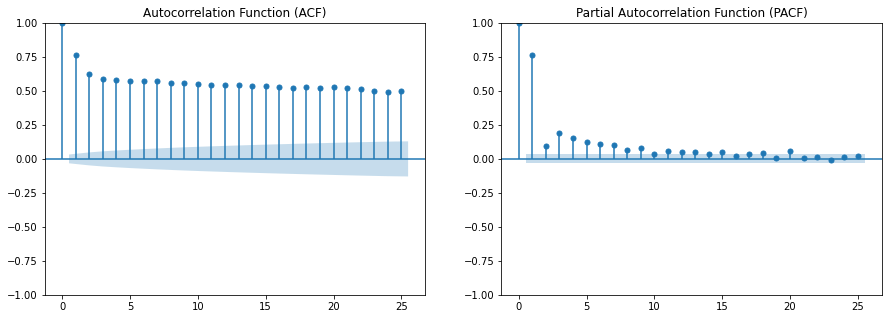

In [13]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Plot the ACF and PACF
fig, axes = plt.subplots(1, 2, figsize=(15,5))

# Plot ACF
plot_acf(df['Temp'], lags=25, ax=axes[0])
axes[0].set_title('Autocorrelation Function (ACF)')

# Plot PACF
plot_pacf(df['Temp'], lags=25, ax=axes[1], method='ywm')
axes[1].set_title('Partial Autocorrelation Function (PACF)')

plt.show()

In [14]:
# reserve last 10 days as testing set 
train = temp[:len(temp) -7]
test = temp[len(temp) -7:]

In [15]:
from statsmodels.tsa.ar_model import AutoReg
model = AutoReg(train , lags=10).fit()

In [16]:
print(model.summary())

                            AutoReg Model Results                             
Dep. Variable:                   Temp   No. Observations:                 3645
Model:                    AutoReg(10)   Log Likelihood               -8371.062
Method:               Conditional MLE   S.D. of innovations              2.420
Date:                Fri, 05 Jul 2024   AIC                          16766.123
Time:                        13:01:40   BIC                          16840.504
Sample:                            10   HQIC                         16792.618
                                 3645                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9404      0.143      6.578      0.000       0.660       1.221
Temp.L1        0.5896      0.017     35.563      0.000       0.557       0.622
Temp.L2       -0.0709      0.019     -3.690      0.0

In [17]:
pred = model.predict(start=len(train) , end = len(temp)-1 , dynamic = False)

3645    11.541843
3646    12.637557
3647    13.057582
3648    13.020602
3649    12.854722
3650    12.688735
3651    12.440215
dtype: float64


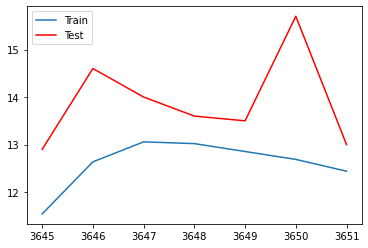

In [24]:
plt.plot(pred , label='Train')
plt.plot(test, color = 'red' , label='Test')
plt.legend()
print(pred)

# Calculate error 

In [27]:
from math import sqrt
from sklearn.metrics import mean_squared_error 
rmse = sqrt(mean_squared_error(test,pred))
print(rmse)

1.5453655496486745


# Future prediction

In [30]:
pred_future=model.predict(start=len (temp)+1, end=len (temp) +7, dynamic=False)
print("The future prediction for the next week")
print (pred_future)
print('Number of Predictions Made: \t',len (pred_future))

The future prediction for the next week
3653    12.312107
3654    12.198146
3655    12.242804
3656    12.307866
3657    12.319153
3658    12.281825
3659    12.232087
dtype: float64
Number of Predictions Made: 	 7
